## Project 2: Dataset Merging, Data Manipulation, K-Means Clustering

In [1]:
# @title Loading packages
import pandas as pd
import random
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
students = [f"Student {i}" for i in range(1, 51)]
reg_numbers = [f"Reg-{1000+i}" for i in range(50)]
tt1_marks = [random.randint(0, 20) for _ in range(50)]
tt2_marks = [random.randint(0, 20) for _ in range(50)]

In [3]:
# @title 01. Creating csv file of TT-1
df_tt1 = pd.DataFrame({"Registration Number": reg_numbers, "Name": students, "TT-1 Marks": tt1_marks})
df_tt1.to_csv("term-test-1-result.csv", index=False) # creating csv file for TT-1

In [4]:
# @title 02. Creating csv file of TT-2
df_tt2 = pd.DataFrame({"Registration Number": reg_numbers, "Name": students, "TT-2 Marks": tt2_marks})
df_tt2.to_csv("term-test-2-result.csv", index=False) # creating csv file for TT-2

In [5]:
# @title 03. Loading both TT-1 and TT-2 and marging both files
# loadng data
df_tt1 = pd.read_csv("term-test-1-result.csv")
df_tt2 = pd.read_csv("term-test-2-result.csv")

merged_df = pd.merge(df_tt1, df_tt2, on=["Registration Number", "Name"])
print(merged_df.head())

  Registration Number       Name  TT-1 Marks  TT-2 Marks
0            Reg-1000  Student 1          10          12
1            Reg-1001  Student 2          20           5
2            Reg-1002  Student 3          10          16
3            Reg-1003  Student 4          13           3
4            Reg-1004  Student 5           2           8


In [6]:
# @title 04. Making new columns for best and average marks for both term tests!!
merged_df["Best Marks"] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df["Average Marks"] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)


In [7]:
print(merged_df.head(4))
merged_df.info()

  Registration Number       Name  TT-1 Marks  TT-2 Marks  Best Marks  \
0            Reg-1000  Student 1          10          12          12   
1            Reg-1001  Student 2          20           5          20   
2            Reg-1002  Student 3          10          16          16   
3            Reg-1003  Student 4          13           3          13   

   Average Marks  
0           11.0  
1           12.5  
2           13.0  
3            8.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Registration Number  50 non-null     object 
 1   Name                 50 non-null     object 
 2   TT-1 Marks           50 non-null     int64  
 3   TT-2 Marks           50 non-null     int64  
 4   Best Marks           50 non-null     int64  
 5   Average Marks        50 non-null     float64
dtypes: float64(1), int64(3), object(2)
me

In [8]:
# @title 05. Dropping both tt-1 and tt-2 columns
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)
print(merged_df.head())

  Registration Number       Name  Best Marks  Average Marks
0            Reg-1000  Student 1          12           11.0
1            Reg-1001  Student 2          20           12.5
2            Reg-1002  Student 3          16           13.0
3            Reg-1003  Student 4          13            8.0
4            Reg-1004  Student 5           8            5.0


In [9]:
# @title 06. Making new csv file adding Attendence and Term Final result
attendance = [random.randint(5, 10) for _ in range(50)]
term_final = [random.randint(40, 100) for _ in range(50)]

attendance_df = pd.DataFrame({"Registration Number": reg_numbers, "Attendance Marks": attendance, "Term Final Marks": term_final})

final_df = pd.merge(merged_df, attendance_df, on="Registration Number")
final_df["Final Marks"] = final_df["Term Final Marks"] * 0.7 + final_df["Average Marks"] + final_df["Attendance Marks"]

print(final_df.head())

  Registration Number       Name  Best Marks  Average Marks  Attendance Marks  \
0            Reg-1000  Student 1          12           11.0                 5   
1            Reg-1001  Student 2          20           12.5                 5   
2            Reg-1002  Student 3          16           13.0                10   
3            Reg-1003  Student 4          13            8.0                 5   
4            Reg-1004  Student 5           8            5.0                 9   

   Term Final Marks  Final Marks  
0                61         58.7  
1                58         58.1  
2               100         93.0  
3                98         81.6  
4                96         81.2  


In [10]:
# @title 07. Writing csv file
final_df.to_csv("final result.csv", index=False)

### 08. Cluster Model

In [11]:
final_df.columns

Index(['Registration Number', 'Name', 'Best Marks', 'Average Marks',
       'Attendance Marks', 'Term Final Marks', 'Final Marks'],
      dtype='object')

In [12]:
# X = final_df[["Final Marks", "Best Marks"]]
X = final_df[["Final Marks"]] # clustering with single feature

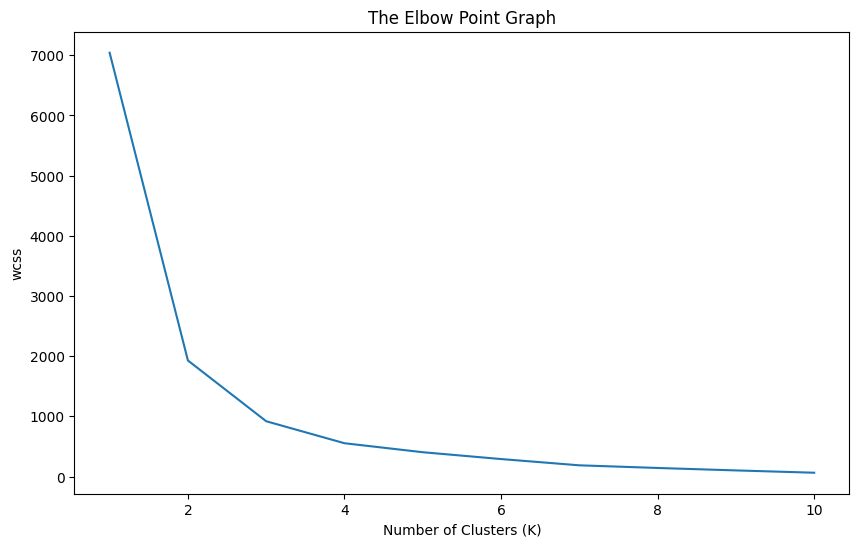

In [13]:
# identlifying the number of clusters with Elbow Point graphs
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=36)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

In [14]:
# @title 08. Fitting K-Means Clustering model
X = final_df[['Final Marks']].values
kmeans = KMeans(n_clusters=4, random_state=36, n_init=15)
final_df["Cluster"] = kmeans.fit_predict(X)

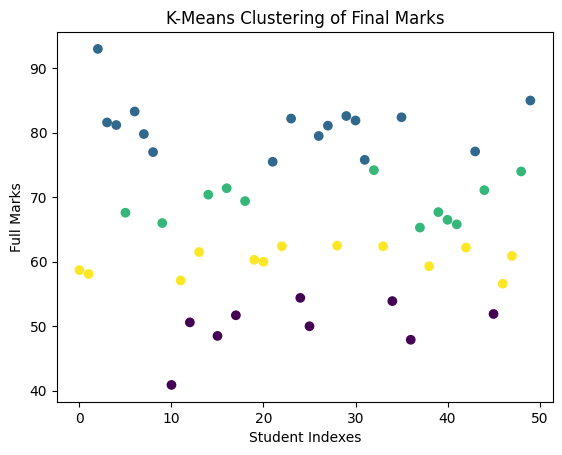

In [16]:
# Scatter plotting the clusters
# plt.scatter(np.zeros_like(final_df["Final Marks"]), final_df[["Final Marks"]], c=final_df["Cluster"], cmap="viridis")
plt.scatter(final_df.index, final_df[["Final Marks"]], c=final_df["Cluster"], cmap="viridis")
plt.xlabel("Student Indexes")
plt.ylabel("Full Marks")
plt.title("K-Means Clustering of Final Marks")
plt.show()